<a href="https://colab.research.google.com/github/sunilhucharaddi/fastai-v3/blob/master/Breakfast_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

**Create dataset of Breakfasts from google images**





In [0]:
folder = 'dosa'
file = 'dosa.txt'

In [0]:
folder = 'idli'
file = 'idli.txt'

In [0]:
folder = 'vada'
file = 'vada.txt'

In [0]:
folder = 'paratha'
file = 'paratha.txt'

In [0]:
folder = 'puri'
file = 'puri.txt'

In [0]:
folder = 'upma'
file = 'upma.txt'

In [0]:
folder = 'poha'
file = 'poha.txt'

In [17]:
!ls


data	  gdrive    models	 poha.txt  upma.txt
dosa.txt  idli.txt  paratha.txt  puri.txt  vada.txt


**TO SAVE AND WRITE INTO GOOGLE DRIVE**

In [0]:
/content/gdrive/My Drive

In [0]:
path = Path('gdrive/My Drive/data/breakfast')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [23]:
!ls

data	  gdrive    models	 poha.txt  upma.txt
dosa.txt  idli.txt  paratha.txt  puri.txt  vada.txt


In [0]:
from fastai.vision import *


In [55]:
path.ls()

[PosixPath('gdrive/My Drive/data/breakfast/dosa'),
 PosixPath('gdrive/My Drive/data/breakfast/idli'),
 PosixPath('gdrive/My Drive/data/breakfast/vada'),
 PosixPath('gdrive/My Drive/data/breakfast/paratha'),
 PosixPath('gdrive/My Drive/data/breakfast/puri'),
 PosixPath('gdrive/My Drive/data/breakfast/upma'),
 PosixPath('gdrive/My Drive/data/breakfast/poha')]

**Downloading images**

I follow lesson 2 notebook of fastai to scrape images from google images

In [0]:
download_images(file,dest,max_pics=500)

In [0]:
dest.ls()

In [0]:
classes = ['dosa','idli','vada','paratha', 'puri','upma','poha']

**Remove un-openable files**

In [59]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dosa


idli


vada


paratha


puri


upma


poha


**Visualise the data**

In [0]:
np.random.seed(0)
data = ImageDataBunch.from_folder(path,train = ".",valid_pct = 0.2,
                                  ds_tfms = get_transforms(),size=224, num_workers=4).normalize(imagenet_stats)


In [65]:
data.classes

['dosa', 'idli', 'paratha', 'poha', 'puri', 'upma', 'vada']

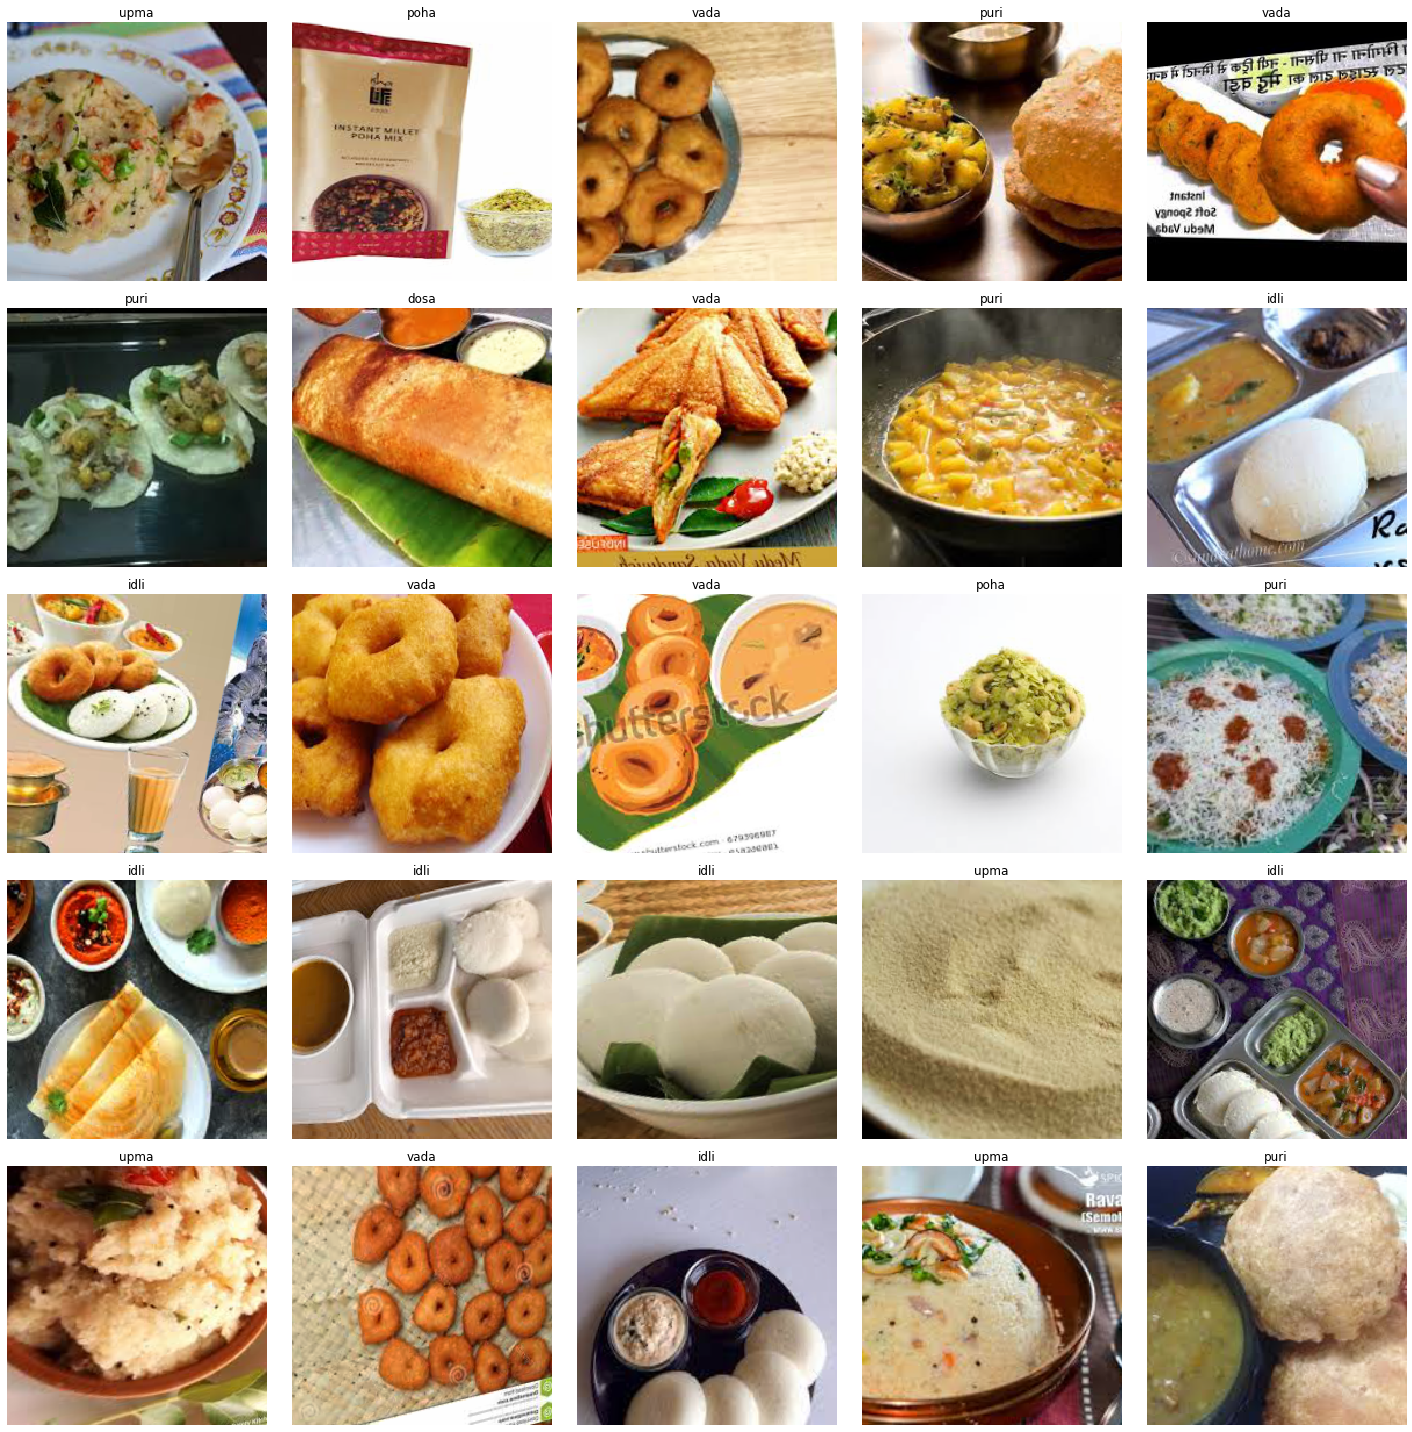

In [74]:
data.show_batch(rows= 5)

In [75]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:05<00:00, 16.5MB/s]


In [76]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,2.087256,0.941095,0.287500,00:18
1,1.453571,0.827386,0.225000,00:18
2,1.085017,0.707102,0.215000,00:18
3,0.860469,0.670035,0.205000,00:18


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [79]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


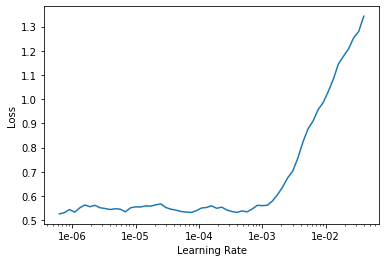

In [80]:
learn.recorder.plot()

In [81]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.591364,0.611697,0.167500,00:18
1,0.446147,0.549780,0.170000,00:18


In [0]:
learn.save('stage-2')

**Interpretation**

In [83]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dosa,dosa,dosa,dosa,dosa
Path: gdrive/My Drive/data/breakfast;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
idli,puri,puri,paratha,poha
Path: gdrive/My Drive/data/breakfast;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momen

In [84]:
interp = ClassificationInterpretation.from_learner(learn)


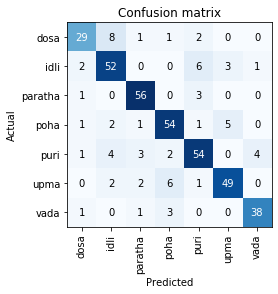

In [85]:
interp.plot_confusion_matrix()
